In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

In [47]:
df= yf.download('LTC-USD', strat= '2017-01-01')

[*********************100%***********************]  1 of 1 completed


In [48]:
def strategy(df, window= 1):
  df= df.copy()
  df['ret'] = np.log(df.Close.pct_change()+1)
  df['prior_n'] = df.ret.rolling(window).sum()
  df.dropna(inplace= True)
  df['position'] = [1 if i > 0 else -1 for i in df.prior_n]
  df['strat'] = df.position.shift(1) * df.ret
  return np.exp(df[['ret', 'strat']].cumsum()).plot(figsize=(12,6))


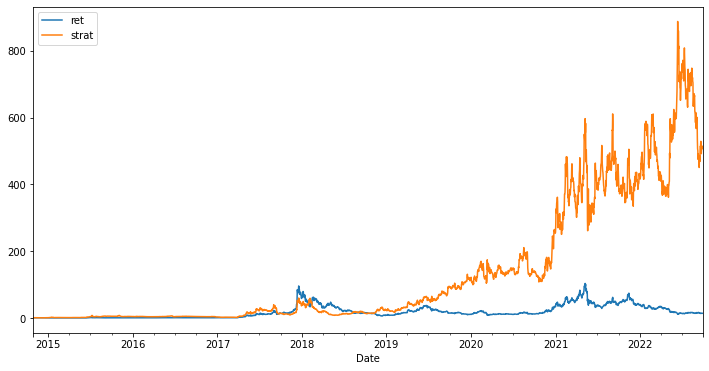

In [49]:
strategy(df,40)

In [50]:
# Interday
df1=yf.download('LTC-USD', strat= '2022-09-25', interval= '1m')

[*********************100%***********************]  1 of 1 completed


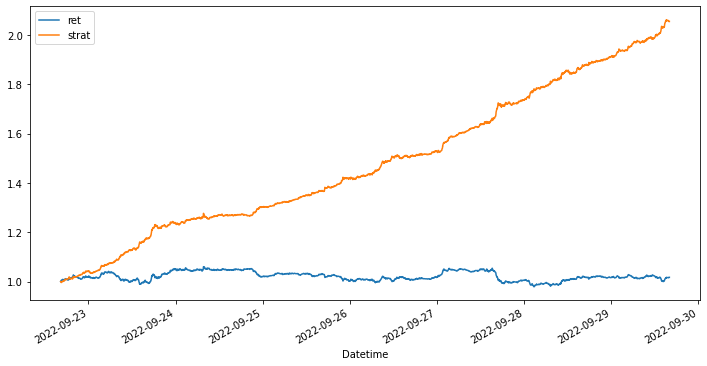

In [51]:
strategy(df1,10)